In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


%matplotlib inline
sns.set(rc={'figure.figsize' : [8, 6]}, font_scale=1.2)

In [2]:
df_train = pd.read_csv("C:\\Users\\amjda\\Downloads\\titanic (1)\\train.csv")

# Defining the data

In [3]:
df_train.head()
#pclass: Passenger class (1st = 1, 2nd= 2, 3rd= 3)
#survived: (No = 0, Yes = 1)
#SibSp: Siblings / Spouses aboard the Titanic
#Parch: Parents / Children aboard the Titanic
#Fare: Passenger fare
#Embarked: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cleaning The Data 

In [4]:
df_train.describe() #No incorrect data found for the numerical data...

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

#Sex is a String
#Embarked is a String
#null values at Age & Cabin, Embarked..

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.nunique()
#getting inconissitent values (if any) ... didn't find any 

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [7]:
df_train.drop(['PassengerId', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True )

# Visualzations

<AxesSubplot:xlabel='Age'>

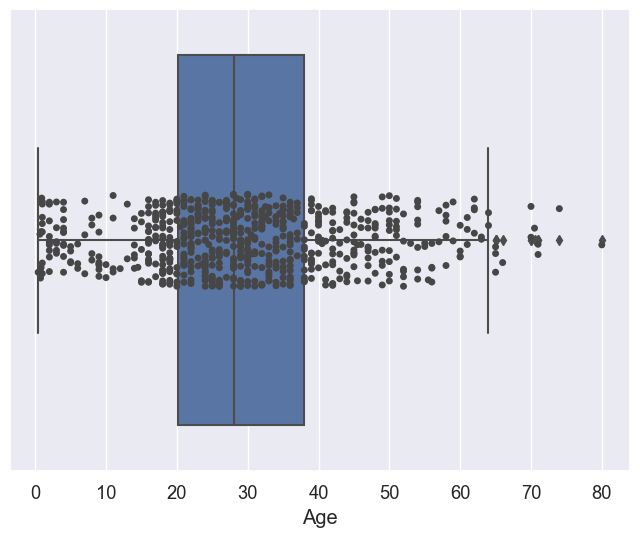

In [8]:
sns.boxplot(x='Age', data=df_train)
sns.stripplot(x='Age', data=df_train, color='#474646')

#getting outliers..there is some outliers 

<AxesSubplot:xlabel='Pclass'>

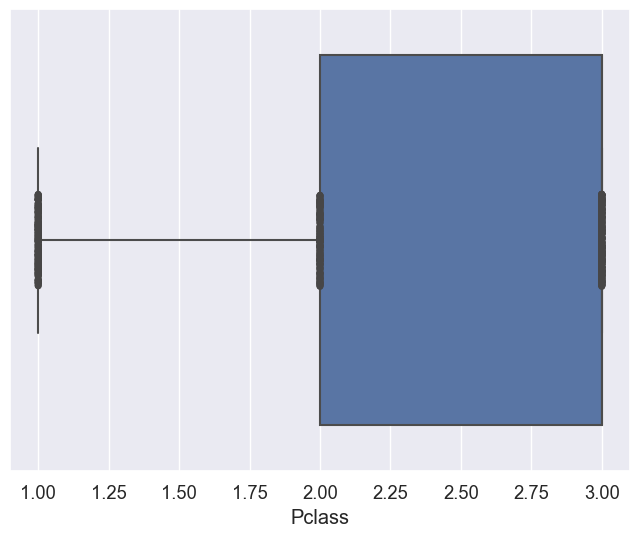

In [9]:
sns.boxplot(x='Pclass', data=df_train)
sns.stripplot(x='Pclass', data=df_train, color='#474646') #No outliers here

<AxesSubplot:xlabel='SibSp'>

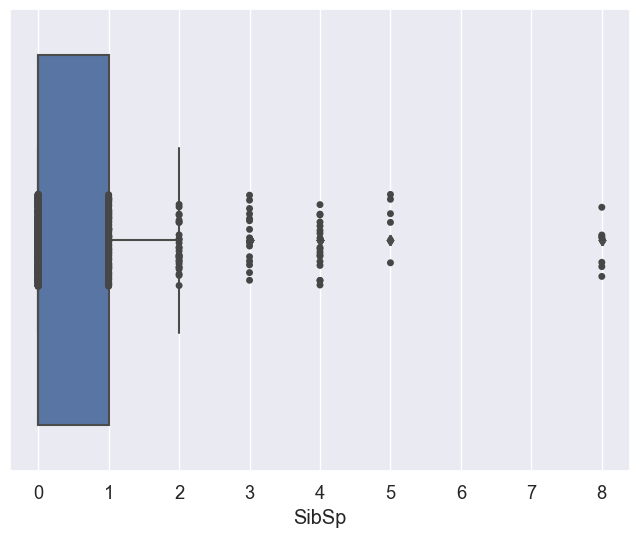

In [10]:
sns.boxplot(x='SibSp', data=df_train)
sns.stripplot(x='SibSp', data=df_train, color='#474646') 

#getting ouliers..It's a natural outliers (we may not need to do processing to those)

In [11]:
#getting the correlation
mycols= ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

my_df = df_train[mycols] 

<AxesSubplot:>

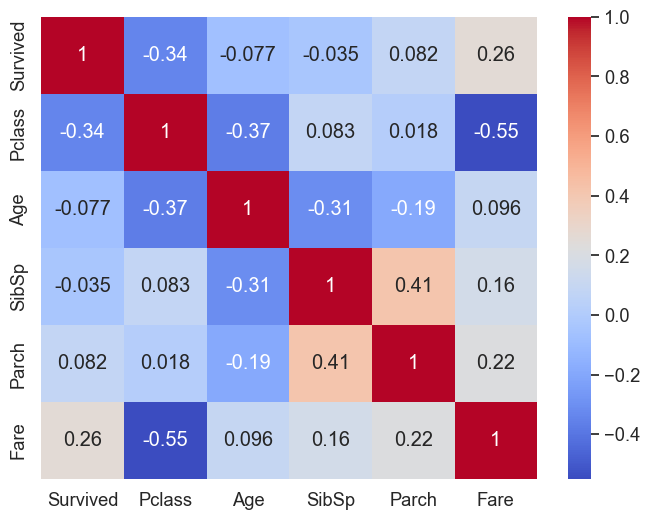

In [12]:
sns.heatmap(my_df.corr(), annot=True, cmap ='coolwarm')
#Pclass & Fare: have a good correlations
#Pclass & Survived : maybe the people who were the high class was in better place  in the ship
#Pclass & Age have a good correlations
#Parch & SibSP have a good correlations 

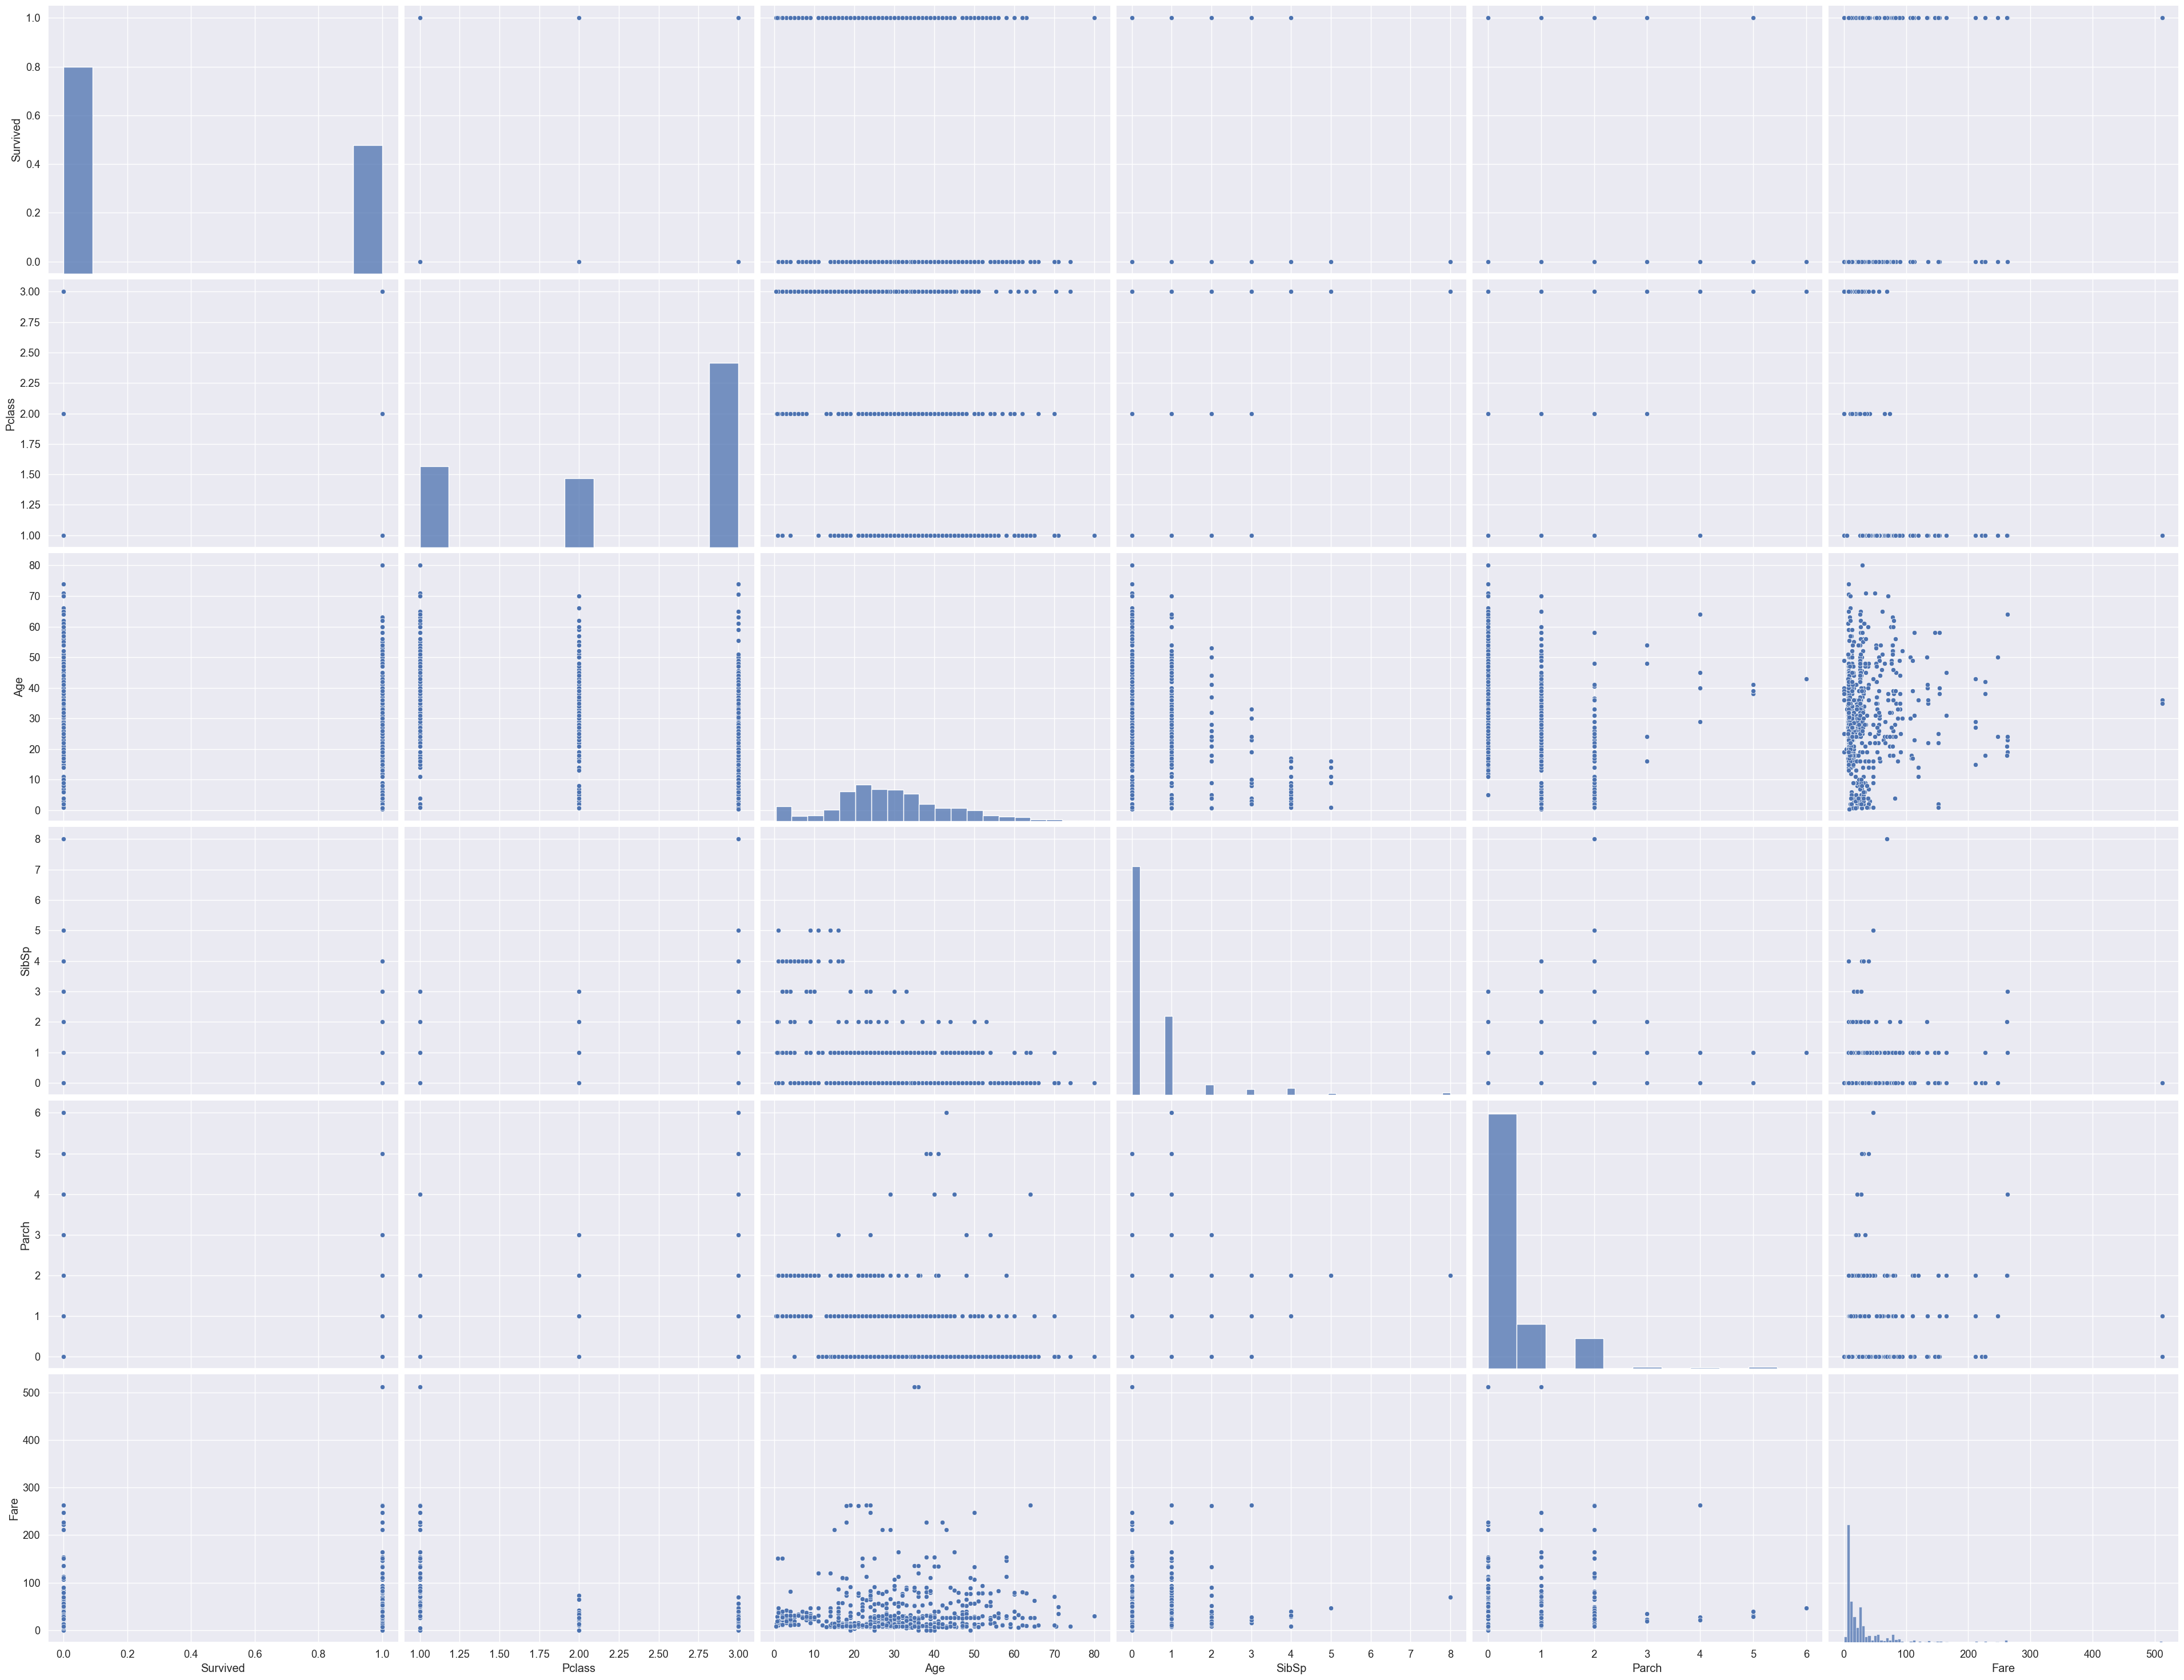

In [13]:
mycols= ['Survived', 'Pclass', 'Age','Sex',  'SibSp', 'Parch', 'Fare']

my_df = df_train[mycols] 

sns.pairplot(my_df, height=5, aspect=1.3)
#get the correlations between them 

<AxesSubplot:xlabel='Survived', ylabel='count'>

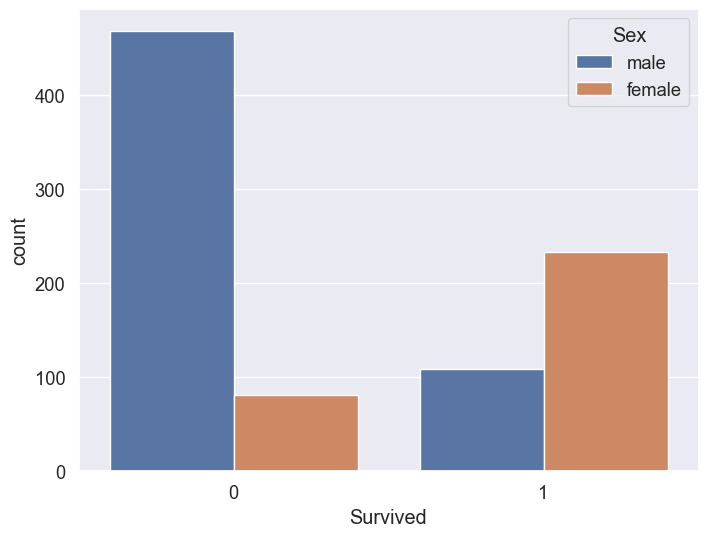

In [14]:
sns.countplot(x='Survived', hue='Sex', data =df_train)
#amount of died < amount of survived in the training set
#number of survived female is more than # survived men  


<AxesSubplot:xlabel='Survived', ylabel='Count'>

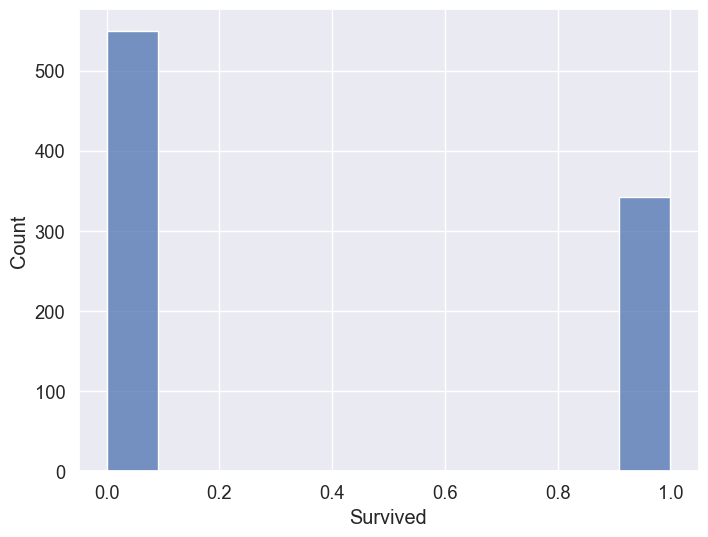

In [15]:
sns.histplot(df_train['Survived'],)
#Here as well..died < survived 

<AxesSubplot:xlabel='Sex', ylabel='Count'>

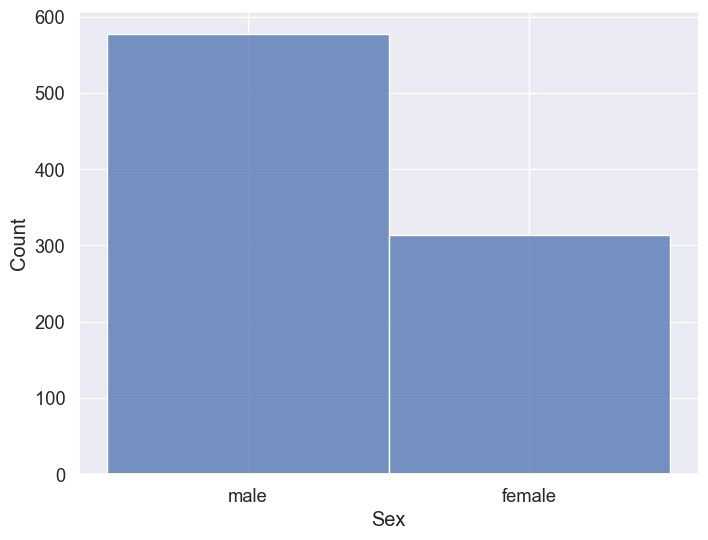

In [16]:
sns.histplot(df_train['Sex'])
#Amount of male is more than female 

'as we see, Pclass=3 have alot of male & we see that many men were died. so we can say there might be a relation between \nPclass & Survived'

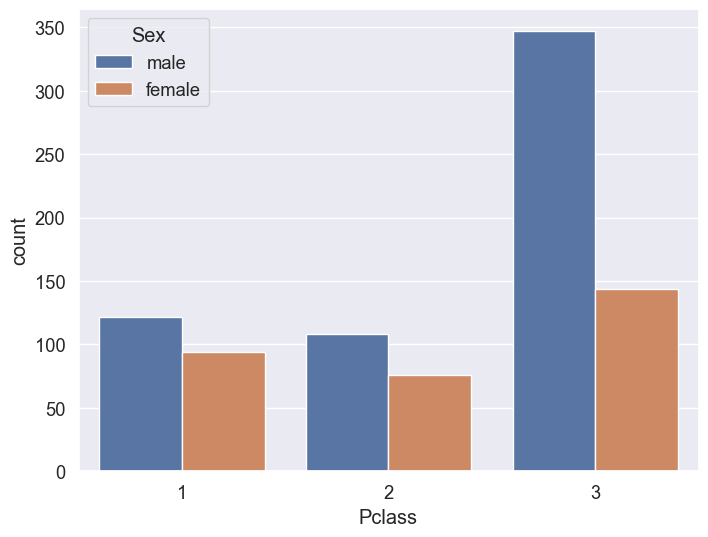

In [17]:
sns.countplot(x='Pclass', hue='Sex', data = df_train)

"""as we see, Pclass=3 have alot of male & we see that many men were died. so we can say there might be a relation between 
Pclass & Survived"""

<AxesSubplot:xlabel='Pclass', ylabel='count'>

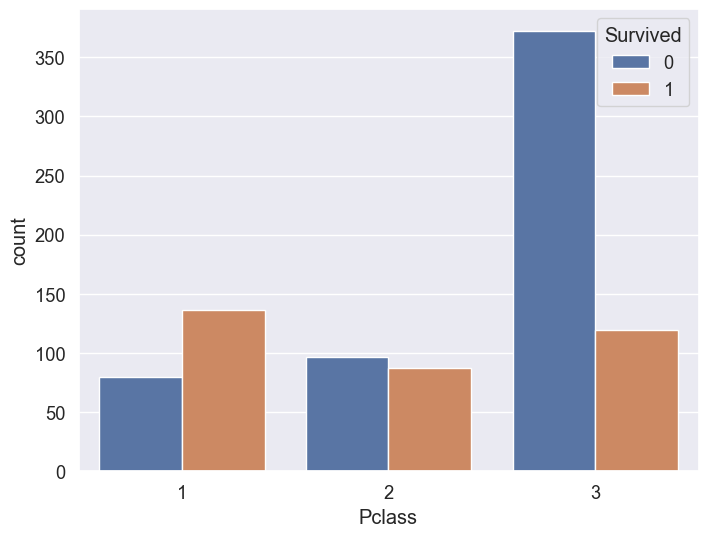

In [18]:
sns.countplot(x='Pclass', hue='Survived', data = df_train)
#as we can see...
#Pclass=3 , have a lot of people
#Pclass=2 , have a higher percentage of died than survived people with a bit
#Pclass=1 , have more survived than died ... maybe because they are close to the surface of the aboard

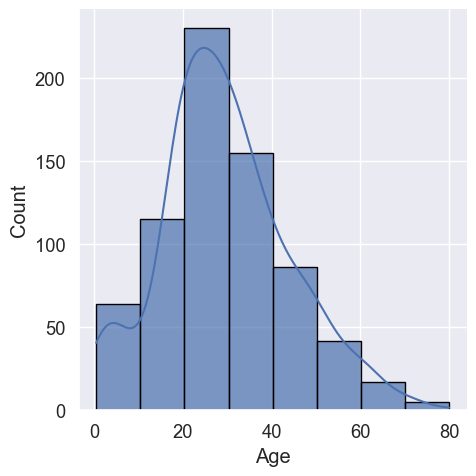

In [19]:
sns.displot(df_train['Age'], bins=8 , kde=True, edgecolor='black', alpha=.7)
#People 20-30 were the most in the training set

In [20]:
#Feature engineering
#Create a column called Family, add Sb&parch
df_train['Family'] = df_train['Parch']+df_train['SibSp']

#
df_train['Sex'] = df_train['Sex'].replace(['male', 'female'], [0, 1])

In [21]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,1
2,1,3,1,26.0,0,0,7.9250,S,0
3,1,1,1,35.0,1,0,53.1000,S,1
4,0,3,0,35.0,0,0,8.0500,S,0


In [22]:
df_train.drop(['SibSp', 'Parch'], inplace=True, axis=1) 
df_train.drop(['Fare'], inplace=True, axis=1) 

In [23]:
df_train.head()

,Survived,Pclass,Sex,Age,Embarked,Family
0,0,3,0,22.0,S,1
1,1,1,1,38.0,C,1
2,1,3,1,26.0,S,0
3,1,1,1,35.0,S,1
4,0,3,0,35.0,S,0


## Feature Engineering

In [24]:
#fill the missing data with mean for Age and mode for Embarked
imputer = SimpleImputer(strategy='mean')
df_train['Age'] = imputer.fit_transform(df_train[['Age']])

imputer = SimpleImputer(strategy='most_frequent')
df_train['Embarked'] = imputer.fit_transform(df_train[['Embarked']])

In [25]:
ages = df_train['Age']

lower_bound = ages.mean() - 3 * ages.std()
upper_bound = ages.mean() + 3 * ages.std()

ages_clipped = ages.clip(lower_bound, upper_bound)
outliers = ages[ages != ages_clipped]

print("Outliers in Age:")
print(outliers)

Outliers in Age:
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


In [26]:
#get dummies for Embarked & Pclass
df_train = pd.get_dummies(df_train, columns=['Pclass', 'Embarked'])

In [27]:
df_train.head()

,Survived,Sex,Age,Family,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,0,0,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,1,0,0,1,0,0
2,1,1,26.0,0,0,0,1,0,0,1
3,1,1,35.0,1,1,0,0,0,0,1
4,0,0,35.0,0,0,0,1,0,0,1


## Splitting data

In [28]:
X = df_train.drop(['Survived'], axis=1)
y = df_train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=10)

In [29]:
SC = StandardScaler()
SC.fit(X_train)

StandardScaler()

# Random_Forest

In [30]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test) 

In [31]:
rf_classifier.score(X_test, y_test)
rf_classifier.score(X_train, y_train)

0.9311797752808989

## XgBoost

In [32]:
xgb_classifier = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_classifier.fit(X_train, y_train)

y_pred = xgb_classifier.predict(X_test)

In [33]:
xgb_classifier.score(X_train, y_train)

0.8820224719101124

In [34]:
xgb_classifier.score(X_test, y_test)

0.8212290502793296

In [35]:
svc = SVC()
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

In [36]:
svc.score(X_train, y_train)

0.6292134831460674

In [37]:
svc.score(X_test, y_test)

0.6815642458100558